In [3]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Diamonds Prices2022.csv', index_col = 0)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
print(f'Number of samples: {data.shape[0]}')
print(f"Number of features : {data.shape[1]}")

Number of samples: 53943
Number of features : 10


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
print(f'The number of duplicate rows : {data.duplicated().sum()}') 

The number of duplicate rows : 149


In [10]:
import copy

copyData = copy.deepcopy(data) 
copyData.drop_duplicates(inplace= True)
print(f'The number of duplicate rows : {copyData.duplicated().sum()}') 

The number of duplicate rows : 0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

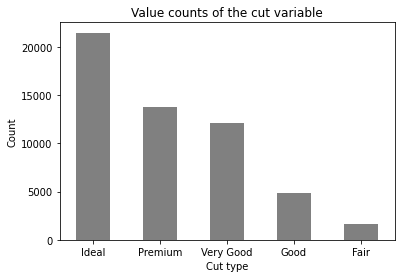

In [12]:
copyData.cut.value_counts().plot(kind="bar", color='gray')
plt.title("Value counts of the cut variable")
plt.xlabel("Cut type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

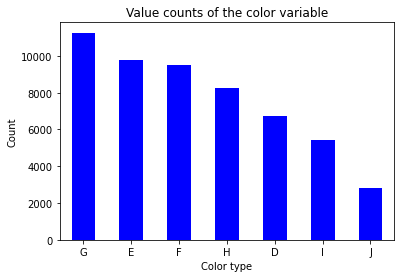

In [13]:
copyData.color.value_counts().plot(kind="bar", color='blue')
plt.title("Value counts of the color variable")
plt.xlabel("Color type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

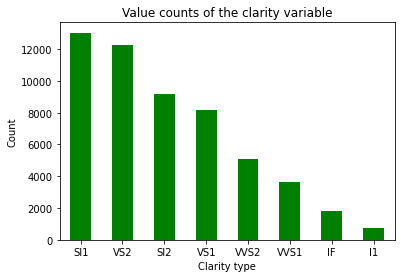

In [14]:
copyData.clarity.value_counts().plot(kind="bar", color='green')
plt.title("Value counts of the clarity variable")
plt.xlabel("Clarity type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [ ]:
sns.pairplot(copyData)

In [ ]:
newData = copy.deepcopy(copyData.loc[(copyData.table <= 75) & (copyData.depth >= 40)
                      & (copyData.x != 0) & (copyData.y <= 15) 
                      & (copyData.y != 0) & (copyData.z <= 10) 
                      & (copyData.z != 0) & (copyData.depth <= 75)
                      & (copyData.depth >= 50)])
sns.pairplot(newData)

In [17]:
newData.corrwith(newData.price)

carat    0.921554
depth   -0.010737
table    0.126688
price    1.000000
x        0.887126
y        0.888715
z        0.882036
dtype: float64

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
newData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
x1_train = newData[['x', 'y', 'z', 'carat', 'table', 'depth']].values
x1_train

array([[ 3.95,  3.98,  2.43,  0.23, 55.  , 61.5 ],
       [ 3.89,  3.84,  2.31,  0.21, 61.  , 59.8 ],
       [ 4.05,  4.07,  2.31,  0.23, 65.  , 56.9 ],
       ...,
       [ 5.66,  5.68,  3.56,  0.7 , 60.  , 62.8 ],
       [ 6.15,  6.12,  3.74,  0.86, 58.  , 61.  ],
       [ 5.83,  5.87,  3.64,  0.75, 55.  , 62.2 ]])

In [22]:
y1_train = newData.price.values
y1_train

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [23]:
reg1 = DecisionTreeRegressor().fit(x1_train, y1_train)
acc = reg1.score(x1_train, y1_train)

print(f'Our accuracy is {acc:.4f}') 

Our accuracy is 0.9985


In [24]:
regData = copy.deepcopy(newData)
regData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
regData.replace(to_replace=['J', 'I', 'D', 'H', 'F', 'E', 'G'], 
                value=[1, 2, 3, 4, 5, 6, 7], inplace=True)

regData.replace(to_replace=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                value=[1, 2, 3, 4, 5], inplace=True)

regData.replace(to_replace=['I1', 'IF', 'VVS1', 'VVS2', 'VS1', 'SI2', 'VS2', 'SI1'],
                value=[1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

regData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,6,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,8,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,7,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,6,63.3,58.0,335,4.34,4.35,2.75


In [26]:
x2_train = regData[['x', 'y', 'z', 'carat', 'table', 'depth', 'cut', 'color', 'clarity']].values
x2_train

array([[3.95, 3.98, 2.43, ..., 5.  , 6.  , 6.  ],
       [3.89, 3.84, 2.31, ..., 4.  , 6.  , 8.  ],
       [4.05, 4.07, 2.31, ..., 2.  , 6.  , 5.  ],
       ...,
       [5.66, 5.68, 3.56, ..., 3.  , 3.  , 8.  ],
       [6.15, 6.12, 3.74, ..., 4.  , 4.  , 6.  ],
       [5.83, 5.87, 3.64, ..., 5.  , 3.  , 6.  ]])

In [27]:
y2_train = regData.price.values
y2_train

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [28]:
reg2 = DecisionTreeRegressor().fit(x2_train, y2_train)

acc = reg2.score(x2_train, y2_train)

print(f'Our accuracy is {acc:.4f}') 

Our accuracy is 1.0000
